In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.cwd() / 'output'

In [126]:
def parse_sid(row):
    _sid = row['sid'].astype(str)
    return int(_sid[:7]), int(_sid[7:11]), int(_sid[11:])

count    1.200000e+03
mean     1.219272e+07
std      3.908773e+07
min      5.217477e+05
25%      5.217477e+05
50%      8.817150e+05
75%      3.261126e+06
max      3.507566e+08
Name: predict_result, dtype: float64
               sid         label  predict_result       ID  year season
4    2022004202104  7.839168e+07    6.295122e+07  2022004  2021   04.0
885  2022007202104  2.685636e+05    5.217477e+05  2022007  2021   04.0
888  2022014202104  1.243022e+06    1.650390e+06  2022014  2021   04.0
314  2022015202104  2.187136e+05    5.217477e+05  2022015  2021   04.0
316  2022017202104  5.895226e+05    6.242781e+05  2022017  2021   04.0
(1100, 6)


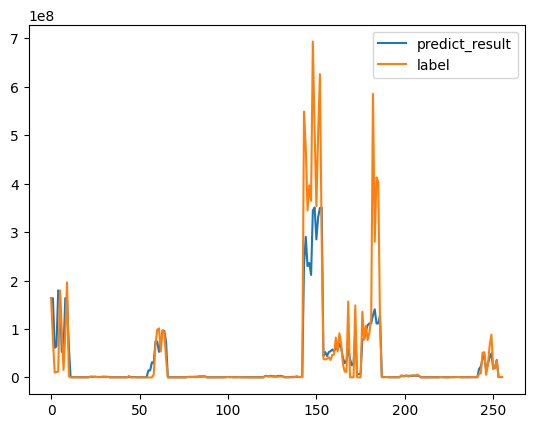

In [209]:
# 季度数据处理
predict_data = pd.read_csv(
    base_dir / '003_result_202211241039394719460.csv').sort_values('sid')[[
        'sid', 'label', 'predict_result'
    ]]
predict_data[['ID', 'year',
              'season']] = predict_data.apply(parse_sid, axis=1,
                                              result_type="expand")
predict_data.to_csv('output/result_sort.csv')
print(predict_data['predict_result'].describe())


# templ_df['result'] = predict_data['label']
submit_df = predict_data.loc[(predict_data['season'].astype(float) == 4)
                             & (predict_data['year'].astype(float) == 2021)]
# print(predict_data['season'].describe())
print(submit_df.head())

submit_df[['ID', 'predict_result'
           ]].to_csv('output/004_submit_202211241039394719460.csv',
                     index=False,
                     header=False)

# predict_data_season = predict_data
predict_data_season = predict_data.drop(index=submit_df.index)

# predict_data_season[:10].plot()
line = plt.plot(range(0, 256),
         predict_data_season[0:256][['predict_result', 'label']]) # 黄色是label，蓝色是predict
plt.legend(iter(line), ['predict_result', 'label'])
print(predict_data_season.shape)
# predict_data_season

In [205]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"均方误差(MSE)：{mean_squared_error(predict_data_season['label'], predict_data_season['predict_result'])}")
print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(predict_data_season['label'], predict_data_season['predict_result']))}")
print(
    f"测试集R^2：{r2_score(predict_data_season['label'], predict_data_season['predict_result'])}"
)


均方误差(MSE)：1081242541140988.8
根均方误差(RMSE)：32882252.677409265
测试集R^2：0.7237538537437911


In [ ]:
gover_df = pd.read_csv(base_dir / 'gover_data_train_3_all.csv')
print(gover_df.columns)

print(gover_df['sjje_per_month'].describe())

y_data = [
    'sjje_per_month', 'month_amount', 'year_amount', 'season'
]
lineObjects = plt.plot(gover_df[24:48]['idx'], gover_df[24:48][y_data])  # 黄色是label，蓝色是 sjje_per_month

# lineObjects = plt.plot(x, y)
plt.yscale('log')
plt.legend(iter(lineObjects), y_data)


# gover_df.loc[(gover_df['season'] == 4) & (gover_df['year'].isin([2021, 2020])),'sjje_per_month'] = 4
# gover_df
# plt.plot(gover_df[:72]['idx'], gover_df[:72]['sjje_per_month'])  # 黄色是label，蓝色是 sjje_per_month

# plt.legend()


## 异常数据分析

Index(['sid', 'month_amount', 'year_amount', 'season', 'zijin', 'year',
       'month_amount_avg', 'y_avg', 'year_y_avg', 'sjje_per_month',
       'year_month_amount_avg'],
      dtype='object')
count    1.000000e+04
mean     4.310400e+06
std      2.000009e+07
min      3.750000e+00
25%      1.047275e+05
50%      6.161655e+05
75%      2.437319e+06
max      5.442100e+08
Name: sjje_per_month, dtype: float64


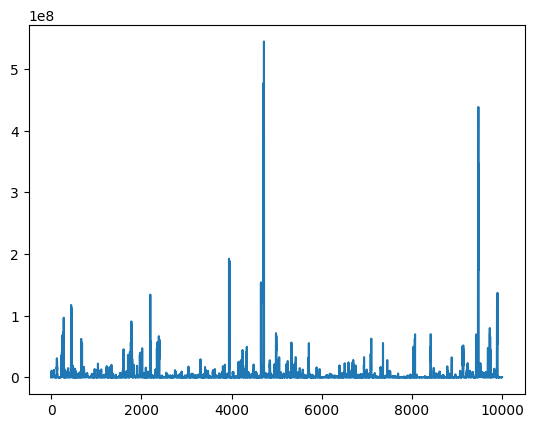

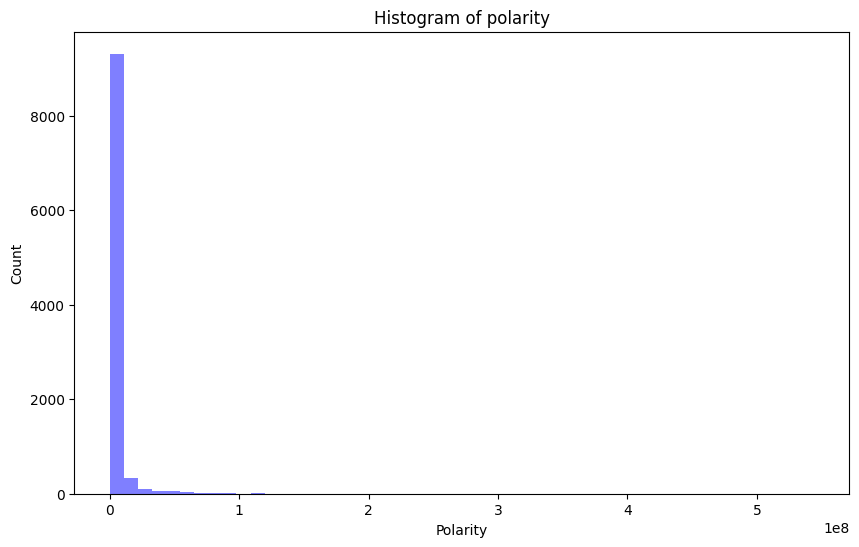

count    10000.000000
mean         1.847902
std          8.574195
min          0.000002
25%          0.044897
50%          0.264155
75%          1.044897
max        233.307074
Name: sjje_per_month_log_robust, dtype: float64

In [52]:
gover_df = pd.read_csv(base_dir / '001_gover_data_train_simple_mean.csv')
print(gover_df.columns)

print(gover_df['sjje_per_month'].describe())

y_data = ['sjje_per_month', 'month_amount', 'year_amount', 'season']
y_data = ['sjje_per_month']
lineObjects = plt.plot(range(0, gover_df.shape[0]),
                       gover_df[y_data])  # 黄色是label，蓝色是 sjje_per_month

# lineObjects = plt.plot(x, y)
# plt.yscale('log')
# plt.legend(iter(lineObjects), y_data)

# gover_df.loc[(gover_df['season'] == 4) & (gover_df['year'].isin([2021, 2020])),'sjje_per_month'] = 4
# gover_df
# plt.plot(gover_df[:72]['idx'], gover_df[:72]['sjje_per_month'])  # 黄色是label，蓝色是 sjje_per_month

# plt.legend()

num_bins = 50
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(gover_df['sjje_per_month'],
                            num_bins,
                            facecolor='blue',
                            alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()


# price，规格 去除 outlier
from sklearn.preprocessing import RobustScaler

robustScale = RobustScaler(with_centering=False)
res = robustScale.fit_transform(gover_df[['sjje_per_month']].values)
gover_df['sjje_per_month_log_robust'] = res[:, 0]
gover_df['sjje_per_month_log_robust'].describe()

In [30]:
gover_df = pd.read_csv(base_dir / '001_gover_data_train_simple_mean.csv')
print(gover_df.shape)
gover_df.head(2)

(10000, 11)


,sid,month_amount,year_amount,season,zijin,year,month_amount_avg,y_avg,year_y_avg,sjje_per_month,year_month_amount_avg
0,2022002201701,2.254535e+08,1.441088e+09,0,7500.0,0,1.944321e+08,1347804.55,791071.25,13162.75,2.254535e+08
1,2022002201702,2.254535e+08,1.441088e+09,1,7500.0,0,2.405347e+08,4944806.15,791071.25,13162.75,2.254535e+08


In [45]:
price_mean = gover_df.groupby('season').agg(
    {'sjje_per_month': [np.mean, np.std]})
price_mean = price_mean.droplevel(0, axis=1).reset_index()
price_mean.head(10)

,season,mean,std
0,0,3.921821e+06,1.982959e+07
1,1,4.162447e+06,2.049043e+07
2,2,3.892194e+06,1.772091e+07
3,3,5.265136e+06,2.172864e+07


In [36]:
# gover_df = pd.read_csv(base_dir / '001_gover_data_train_simple_mean.csv')
# price，规格 去除 outlier


def remove_outlier_price(x):
    y = price_mean[price_mean['season'] == x["season"]]
    if np.abs(x['sjje_per_month'] -
              y['mean'].values[0]) <= (2 * y['std'].values[0]):
        return True
    return False


# data[np.abs(data['A'] - data['A'].mean()) <= (3 * data['A'].std())]

filt = gover_df.apply(lambda x: remove_outlier_price(x), axis=1)
df = gover_df[filt]
print(df.shape)
df.head()

(9829, 11)


,sid,month_amount,year_amount,season,zijin,year,month_amount_avg,y_avg,year_y_avg,sjje_per_month,year_month_amount_avg
0,2022002201701,2.254535e+08,1.441088e+09,0,7500.0,0,1.944321e+08,1347804.55,791071.25,13162.75,2.254535e+08
1,2022002201702,2.254535e+08,1.441088e+09,1,7500.0,0,2.405347e+08,4944806.15,791071.25,13162.75,2.254535e+08
2,2022002201703,2.254535e+08,1.441088e+09,2,7500.0,0,2.363180e+08,2145271.55,791071.25,36579.75,2.254535e+08
3,2022002201704,2.254535e+08,1.441088e+09,3,7500.0,0,2.305291e+08,1789801.95,791071.25,3101379.75,2.254535e+08
4,2022002201801,2.552600e+08,1.493814e+09,0,7500.0,1,1.944321e+08,1347804.55,5167343.50,2212861.00,2.725918e+08


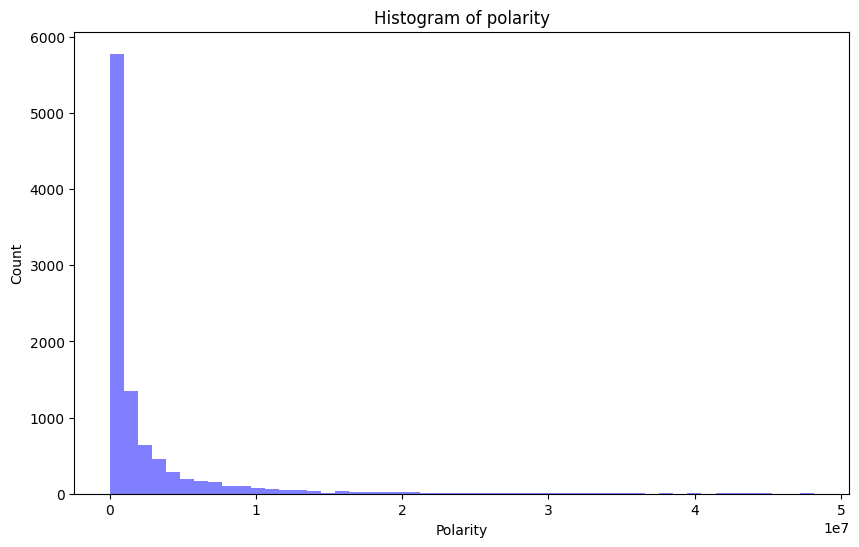

In [43]:
num_bins = 50
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['sjje_per_month'],
                            num_bins,
                            facecolor='blue',
                            alpha=0.5)

plt.xlabel('Polarity')
plt.ylabel('Count')
# plt.yscale('log')
plt.title('Histogram of polarity')
plt.show()

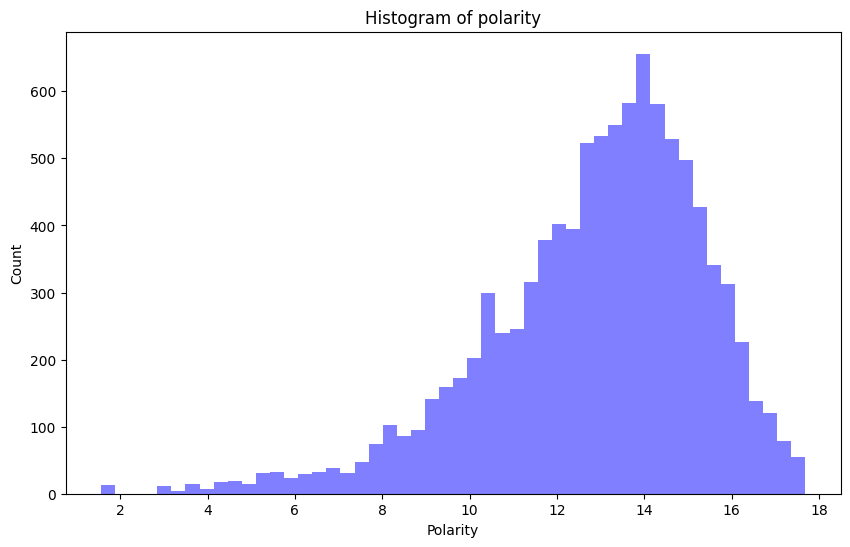

In [42]:
# 将特征数据做log转换，做倒数转换等等
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transform = FunctionTransformer(np.log1p)
# x = np.array([[0, 1], [2, 3]])
df['sjje_per_month_log'] = log_transform.fit_transform(df['sjje_per_month'])
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['sjje_per_month_log'],
                            num_bins,
                            facecolor='blue',
                            alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()


In [73]:
from sklearn.preprocessing import RobustScaler

X = [[1., -2., 2.], [-2., 1., 3.], [4., 1., -2.]]
df = pd.DataFrame(X, columns=['1', '2', '3'])
# print(df.head())
transformer = RobustScaler().fit(df[['1']])
transformer

df[['1']] = transformer.transform(df[['1']])
print(df)
# transformer.get_params()


     1    2    3
0  0.0 -2.0  2.0
1 -1.0  1.0  3.0
2  1.0  1.0 -2.0


In [56]:
transformer.inverse_transform()

array([[ 1., -2.,  2.],
       [-2.,  1.,  3.],
       [ 4.,  1., -2.]])

### 误差分析

In [210]:
predict_data = pd.read_csv(
    base_dir / '003_result_202211240025398387550.csv').sort_values('sid')[[
        'sid', 'label', 'predict_result'
    ]]
predict_data[['ID', 'year',
              'season']] = predict_data.apply(parse_sid,
                                              axis=1,
                                              result_type="expand")
predict_data = predict_data.loc[~((predict_data['season'].astype(float) == 4)
                                & (predict_data['year'].astype(float) == 2021))]
print(predict_data.shape)

predict_data['error'] = predict_data['label'] - predict_data['predict_result']
predict_data['error_abs'] = np.abs(predict_data['error'])
predict_data.to_csv('output/005_error_tmp.csv')
print(predict_data.shape)

(1100, 6)
(1100, 8)


In [211]:
test_data = pd.read_csv(base_dir / '001_gover_data_valid_simple_mean.csv')
print(test_data.shape)
error_data = predict_data.merge(test_data, on='sid', how='left').sort_values(['error_abs', 'ID'], ascending=False)

error_data.to_csv('output/005_error.csv')


(1900, 11)


In [212]:
line_3q = error_data['error_abs'].describe()['75%']
bad_df = error_data[error_data['error_abs'] >= line_3q]
good_df = error_data[error_data['error_abs'] < line_3q]
print(error_data.shape)
print(bad_df.shape, dict(bad_df['zijin'].value_counts()))
print(dict(good_df['zijin'].value_counts()))

(1100, 18)
(275, 18) {13570.5534375: 34, 2000.0: 14, 3000.0: 13, 100860.33: 11, 2790.0: 11, 31000.0: 11, 111200.0: 11, 73248.78: 11, 54399.56: 11, 362.46: 11, 38250.0: 11, 15907.5: 10, 21531.7: 9, 3800.0: 9, 20298.26: 7, 2583.0: 7, 58000.0: 7, 82194.22: 7, 10680.0: 6, 6500.0: 6, 1280.0: 6, 230.0: 6, 160000.0: 5, 26417.0: 5, 10027.4: 5, 4870.0: 4, 80000.0: 4, 1000.0: 4, 2800.0: 4, 6300.0: 4, 6000.0: 2, 10000.0: 2, 17882.25: 2, 3580.0: 1, 69472.18: 1, 7500.0: 1, 2180.0: 1, 11745.0: 1}
{1000.0: 84, 13570.5534375: 54, 500.0: 44, 3000.0: 42, 10000.0: 42, 2000.0: 41, 50.0: 22, 200.0: 22, 300.0: 22, 100.0: 22, 1500.0: 22, 2800.0: 18, 2080.0: 11, 4269.21: 11, 51.0: 11, 4860.0: 11, 7095.0: 11, 4500.0: 11, 1050.0: 11, 210.0: 11, 11054.0: 11, 5000.0: 11, 1470.0: 11, 14995.0: 11, 65883.09: 11, 16917.9: 11, 4920.62: 11, 2489.0: 11, 150.0: 11, 480.0: 11, 9500.0: 11, 1555.67: 11, 3850.0: 11, 220.0: 11, 2180.0: 10, 7500.0: 10, 69472.18: 10, 11745.0: 10, 3580.0: 10, 17882.25: 9, 6000.0: 9, 80000.0: 7, 

In [203]:
error_data[error_data['zijin'] == 0] = error_data['zijin'].mean()
error_data.head(10)

,sid,label,predict_result,ID,year_x,season_x,error,error_abs,month_amount,year_amount,season_y,zijin,year_y,month_amount_avg,y_avg,year_y_avg,sjje_per_month,year_month_amount_avg
182,2.022103e+12,5.851544e+08,1.966251e+08,2022103,2020,03.0,3.885293e+08,3.885293e+08,1.203150e+09,7.953827e+09,2.0000,100860.3300,3.0000,1.059377e+09,1.854922e+08,2.700847e+08,5.851544e+08,1.173161e+09
152,2.022076e+12,6.259139e+08,2.713508e+08,2022076,2021,02.0,3.545631e+08,3.545631e+08,5.969101e+09,2.558905e+10,1.0000,38250.0000,4.0000,5.054119e+09,4.926855e+08,4.495327e+08,6.259139e+08,4.682344e+09
148,2.022076e+12,6.932627e+08,3.521098e+08,2022076,2020,02.0,3.411529e+08,3.411529e+08,5.097978e+09,1.651796e+10,1.0000,38250.0000,3.0000,5.054119e+09,4.926855e+08,4.802174e+08,6.932627e+08,4.798872e+09
151,2.022076e+12,5.044898e+08,2.713508e+08,2022076,2021,01.0,2.331390e+08,2.331390e+08,5.262500e+09,2.498944e+10,0.0000,38250.0000,4.0000,4.515967e+09,4.111128e+08,4.495327e+08,5.044898e+08,4.682344e+09
184,2.022103e+12,4.125744e+08,1.827461e+08,2022103,2021,01.0,2.298282e+08,2.298282e+08,1.453290e+09,6.378111e+09,0.0000,100860.3300,4.0000,1.176306e+09,1.545443e+08,2.694845e+08,4.125744e+08,1.232768e+09
185,2.022103e+12,4.035637e+08,1.775110e+08,2022103,2021,02.0,2.260527e+08,2.260527e+08,1.568525e+09,6.095054e+09,1.0000,100860.3300,4.0000,1.243950e+09,1.516609e+08,2.694845e+08,4.035637e+08,1.232768e+09
275,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04
143,2.022076e+12,5.485029e+08,3.228444e+08,2022076,2019,01.0,2.256585e+08,2.256585e+08,4.062361e+09,2.123344e+10,0.0000,38250.0000,2.0000,4.515967e+09,4.111128e+08,4.412573e+08,5.485029e+08,4.069862e+09
282,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04
279,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,12885.9013,12885.9013,12885.9013,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04,1.288590e+04
